# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.






___

**1) White Noise** : $Z_t \sim \text{WN}\left(0,\sigma^2\right)$

Theoretical mean :

$\forall t \in \mathbb{Z} :$

$\mathbb{E}[Z_t] = 0$

Theoretical autocovariance :

$\forall t \in \mathbb{Z}, \forall h \in \mathbb{Z} :$

$\text{Cov}(Z_t,Z_{t+h}) = \mathbb{E}[(Z_t - \mathbb{E}[Z_t])(Z_{t+h}-\mathbb{E}[Z_{t+h}])] = \mathbb{E}[Z_tZ_{t+h}]
\begin{cases}
\sigma^2 & \text{if } h = 0 \\
0 & \text{otherwise}
\end{cases}$

___
$X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$, with $a,b \in \mathbb{R}$

Theoretical mean :

$\forall t \in \mathbb{Z} :$

$\mathbb{E}[X_t] = \mathbb{E}[a + bZ_t + Z_{t-1}] = a + b\mathbb{E}[Z_t] + \mathbb{E}[Z_{t-1}] = a$

Theoretical autocovariance :

$\forall t \in \mathbb{Z}, \forall h \in \mathbb{Z} :$

$\text{Cov}(X_t,X_{t+h}) = \mathbb{E}[(Z_t - \mathbb{E}[Z_t])(Z_{t+h}-\mathbb{E}[Z_{t+h}])]$

$\text{Cov}(X_t,X_{t+h}) = \mathbb{E}[(bZ_t + Z_{t-1})(bZ_{t+h} + Z_{t+h-1})] = b²\mathbb{E}[Z_tZ_{t+h}] + b(\mathbb{E}[Z_{t-1}Z_{t+h}] + \mathbb{E}[Z_{t}Z_{t+h-1}]) + \mathbb{E}[Z_{t-1}Z_{t+h-1}]$

Furthermore, we have $Z_{t-1}Z_{t+h-1}$ ~ $Z_{t}Z_{t+h} \implies \mathbb{E}[Z_{t-1}Z_{t+h-1}] = \mathbb{E}[Z_{t}Z_{t+h}]$ 


$\text{Cov}(X_t,X_{t+h}) =
\begin{cases}
(b^2+1)\sigma^2 & \text{if } h = 0 \\
b\sigma^2 & \text{if } h = \pm 1 \\
0 & \text{otherwise}
\end{cases}$

___
$X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")

Theoretical mean :

$\forall t \in \mathbb{Z} :$

$\mathbb{E}[X_t] = \mathbb{E}[\sum_{k=0}^{K}2^{-k}Z_{t-k} + a] = a + \sum_{k=0}^{K}2^{-k}\mathbb{E}[Z_{t-k}] = a$

Theoretical autocovariance :

$\forall t \in \mathbb{Z}, \forall h \in \mathbb{Z} :$

$\text{Cov}(X_t,X_{t+h}) = \mathbb{E}[(\sum_{k=0}^{K}2^{-k}Z_{t-k})(\sum_{j=0}^{K}2^{-j}Z_{t+h-j})]$

$\text{Cov}(X_t,X_{t+h}) = \sum_{k=0}^{K}\sum_{j=0}^{K}2^{-j}2^{-k}\mathbb{E}[Z_{t-k}Z_{t+h-j}]$


We know that :
$\mathbb{E}[Z_{t-k}Z_{t+h-j}] =
\begin{cases}
\sigma^2 & \text{if } k = j - h \\
0 & \text{otherwise}
\end{cases}$

$\text{Cov}(X_t,X_{t+h}) = \sum_{k=0}^{K}\sum_{j=0}^{K}2^{-(j+k)}\sigma^2 \mathbb{1}_{\{k = j - h\}}$

We have :
$\begin{cases}
0 \leq k \leq K \\
0 \leq j \leq K \\
k = j - h 
\end{cases}$
$\iff$
$\begin{cases}
0 \leq j-h \leq K \\
0 \leq j \leq K \\
k = j - h 
\end{cases}$
$\iff$
$\begin{cases}
h \leq j \leq K+h \\
0 \leq j \leq K \\
k = j - h 
\end{cases}$
$\iff$
$\begin{cases}
max(0,h) \leq j \leq min(K+h,K) \\
k = j - h 
\end{cases}$

$\text{Cov}(X_t,X_{t+h}) = \sigma^2\sum_{j=max(0,h)}^{min(K+h,K)}2^{-(2j-h)}$

If $ h \geq 0 :$

$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
2^h\sigma^2\sum_{j=h}^{K}2^{-2j} & \text{if } 0 \leq h \leq K \\
0 & \text{if } h > K
\end{cases}$
$\iff$
$p = j-h : $
$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
2^h\sigma^2 2^{-2h}\sum_{p=0}^{K-h}2^{-2p} & \text{if } 0 \leq h \leq K \\
0 & \text{if } h > K
\end{cases}$

$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
2^{-h}\sigma^2 \frac{4}{3} (1-(\frac{1}{4})^{K-h+1}) & \text{if } 0 \leq h \leq K \\
0 & \text{if } h > K
\end{cases}$
$\iff$
$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
\frac{2^{-h+2}\sigma^2(1-(\frac{1}{4})^{K-h+1})}{3} & \text{if } 0 \leq h \leq K \\
0 & \text{if } h > K
\end{cases}$


For values $h \ll K$ :
$(\frac{1}{4})^{K-h+1} \sim 0$ 

$\implies$ $\text{Cov}(X_t,X_{t+h}) = \frac{2^{-h+2}\sigma^2}{3}$ if $0 \leq h \ll K $

If $h < 0 :$

$\text{Cov}(X_t,X_{t+h}) = \sigma^2\sum_{j=max(0,h)}^{min(K+h,K)}2^{-(2j-h)}$

$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
2^h\sigma^2\sum_{j=0}^{K+h}2^{-2j} & \text{if } -K \leq h < 0 \\
0 & \text{if } h < -K
\end{cases}$
$\iff$
$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
2^h\sigma^2 \frac{1-(\frac{1}{4})^{K+h+1}}{1-\frac{1}{4}} & \text{if } -K \leq h < 0 \\
0 & \text{if } h < -K
\end{cases}$

$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
\frac{2^{h+2}\sigma^2(1-(\frac{1}{4})^{K+h+1})}{3} & \text{if } -K \leq h < 0 \\
0 & \text{if } h < -K
\end{cases}$


For values $0 < -h \ll K$ :
$(\frac{1}{4})^{K+h+1} \sim 0$ 

$\implies$ $\text{Cov}(X_t,X_{t+h}) = \frac{2^{h+2}\sigma^2}{3}$ if $0 \leq h \ll K $
___
Harmonic Process: $X_t=A_0\cos(\lambda_0 t+\Phi_0)+Z_t$ where $\lambda_0 \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$

Theoretical mean :

$\forall t \in \mathbb{Z} :$

$\mathbb{E}[X_t] = \mathbb{E}[A_0\cos(\lambda_0 t+\Phi_0)+Z_t] = A_0\mathbb{E}[\cos(\lambda_0 t+\Phi_0)] + A_0\mathbb{E}[Z_t] = A_0\mathbb{E}[\cos(\lambda_0 t+\Phi_0)]$

$\mathbb{E}[X_t] = A_0\mathbb{E}[\cos(\lambda_0 t+\Phi_0)] = A_0\int_0^{2\pi} \frac{\cos(\lambda_0 t+\Phi_0)}{2\pi} \, d\Phi_0 = 0$


Theoretical autocovariance :

$\forall t \in \mathbb{Z}, \forall h \in \mathbb{Z} :$

$\text{Cov}(X_t,X_{t+h}) = \mathbb{E}[(A_0\cos(\lambda_0 t+\Phi_0)+Z_t)(A_0\cos(\lambda_0 (t+h)+\Phi_0)+Z_{t+h})]$

$\text{Cov}(X_t,X_{t+h}) = A_0^2 \mathbb{E}[\cos(\lambda_0 t+\Phi_0)\cos(\lambda_0 (t+h)+\Phi_0)] + A_0(\mathbb{E}[Z_t\cos(\lambda_0 (t+h)+\Phi_0) + Z_{t+h}\cos(\lambda_0 t+\Phi_0)]) + \mathbb{E}[Z_tZ_{t+h}]$

Since $Z_t$ and $\cos(\lambda_0(t+h) + \Phi_0)$ are independant : $\mathbb{E}[Z_t\cos(\lambda_0 (t+h)+\Phi_0)] = \mathbb{E}[Z_t]\mathbb{E}[cos(\lambda_0 (t+h) + \Phi_0)] = 0$

$\text{Cov}(X_t,X_{t+h}) = A_0^2\mathbb{E}[\cos(\lambda_0 t+\Phi_0)\cos(\lambda_0 (t+h)+\Phi_0)] + \mathbb{E}[Z_tZ_{t+h}]$

We know that : $\cos(a)\cos(b) = \frac{1}{2}(\cos(a+b)+\cos(a-b))$

$\text{Cov}(X_t,X_{t+h}) = \frac{A_0^2}{2}\mathbb{E}[\cos(\lambda_0 (2t+h)+2\Phi_0)+\cos(\lambda_0 h)] + \mathbb{E}[Z_tZ_{t+h}]$

$\text{Cov}(X_t,X_{t+h}) = $
$\begin{cases}
\sigma^2 + \frac{A_0^2}{2}\cos(\lambda_0 h) & \text{if } h = 0 \\
\frac{A_0^2}{2}\cos(\lambda_0 h) & \text{otherwise}
\end{cases}$
___

# Empirical mean and autocovariance #

For a random real process $(X_t)_{t > 0}$ :

$\forall n > 0 :$

$\hat{\mu}_n = \frac{1}{n}\sum_{t=1}^{n}X_t$ Empirical mean

$\hat{\gamma}_n = \frac{1}{n}\sum_{1 \leq s \leq n, 1 \leq t \leq n, s - t = \tau}^{}(X_s - \hat{\mu}_n)(X_t - \hat{\mu}_n) $ Empirical autocovariance

Since for a random real process, $\gamma(-\tau) = \overline{\gamma(\tau)} = \gamma(\tau)$, we can decide to compute only the positive values of $\gamma$ 

In [7]:
def empirical_mean(X):
    n = len(X)
    return(sum(X)/n)

def empirical_autocovariance(X,tau):
    if tau < 0:
        tau = -tau
    mu = empirical_mean(X)
    n = len(X)
    gamma = 0
    s = 1
    t = 1+tau
    while t <= n:
        gamma += (X[s-1]-mu)*(X[t-1]-mu)
        t+=1
        s+=1
    return(gamma/n)

In [9]:
import numpy as np

n = 1000
sigma = 1.5

a = 3
b = -2

K = 500

A0 = 4
lambda0 = 0.3
phi0 = np.random.uniform(0,2*np.pi)

def generate_random(n):
    Z = np.random.normal(0,sigma,n+1+K)
    X1 = Z[0:n]  # Random process n°1
    X2 = []
    for i in range(n):
        X2.append(a + b*Z[i+1] + Z[i])
    X3 = []
    for i in range(n):
        s = a
        for k in range (K+1): # 0 <= k <= K
            s += 2**(-k)*Z[K + i - k] # We use this so that every Z[K+i-k] exists, by generating n+1+K random gaussian
        X3.append(s)
    X4 = []
    for i in range(n):
        X4.append(A0*np.cos(lambda0*i+phi0)+Z[i])
    return(X1,X2,X3,X4)

X1,X2,X3,X4 = generate_random(n)

def theoretical_autocovariance(k,tau): # Random process n°k, autocovariance valued at tau (we only take positive values for tau)
    if k == 1:
        if tau == 0:
            return(sigma**2)
        else :
            return(0)
    if k == 2:
        if tau == 0:
            return((b**2+1)*sigma**2)
        if tau == 1:
            return(b*sigma**2)
        else :
            return(0)
    if k == 3:
        return((2**(-tau+2)*sigma**2)/3)
    if k == 4:
        if tau == 0:
            return(sigma**2+(A0**2)*np.cos(lambda0*tau)/2)
        else :
            return((A0**2)*np.cos(lambda0*tau)/2)
    else :
        raise ValueError("k value must be 1,2,3 or 4")
        

In [10]:
print("Process #1 :")
print(f"Empirical mean : {round(empirical_mean(X1),2)}        Theoretical mean : 0.0")
for tau in range(5):
    print(f"For tau = {tau}     Empirical Autocovariance : {round(empirical_autocovariance(X1,tau),2)}      Theoretical Autocovariance : {round(theoretical_autocovariance(1,tau),2)}")

print("\nProcess #2 :")
print(f"Empirical mean : {round(empirical_mean(X2),2)}        Theoretical mean : {a}")
for tau in range(5):
    print(f"For tau = {tau}    Empirical Autocovariance : {round(empirical_autocovariance(X2,tau),2)}      Theoretical Autocovariance : {round(theoretical_autocovariance(2,tau),2)}")  

print("\nProcess #3 :")
print(f"Empirical mean : {round(empirical_mean(X3),2)}        Theoretical mean : {a}")
for tau in range(5):
    print(f"For tau = {tau}     Empirical Autocovariance : {round(empirical_autocovariance(X3,tau),2)}      Theoretical Autocovariance : {round(theoretical_autocovariance(3,tau),2)}")
   
print("\nProcess #4 :")
print(f"Empirical mean : {round(empirical_mean(X4),2)}        Theoretical mean : 0.0")
for tau in range(5):
    print(f"For tau = {tau}    Empirical Autocovariance : {round(empirical_autocovariance(X4,tau),2)}      Theoretical Autocovariance : {round(theoretical_autocovariance(4,tau),2)}")  


Process #1 :
Empirical mean : -0.08        Theoretical mean : 0.0
For tau = 0     Empirical Autocovariance : 2.14      Theoretical Autocovariance : 2.25
For tau = 1     Empirical Autocovariance : -0.02      Theoretical Autocovariance : 0
For tau = 2     Empirical Autocovariance : -0.11      Theoretical Autocovariance : 0
For tau = 3     Empirical Autocovariance : -0.02      Theoretical Autocovariance : 0
For tau = 4     Empirical Autocovariance : -0.01      Theoretical Autocovariance : 0

Process #2 :
Empirical mean : 3.08        Theoretical mean : 3
For tau = 0    Empirical Autocovariance : 10.8      Theoretical Autocovariance : 11.25
For tau = 1    Empirical Autocovariance : -4.17      Theoretical Autocovariance : -4.5
For tau = 2    Empirical Autocovariance : -0.45      Theoretical Autocovariance : 0
For tau = 3    Empirical Autocovariance : 0.11      Theoretical Autocovariance : 0
For tau = 4    Empirical Autocovariance : -0.26      Theoretical Autocovariance : 0

Process #3 :
Empi

C:\Users\Arnaud\AppData\Local\Temp\ipykernel_8296\3630193296.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


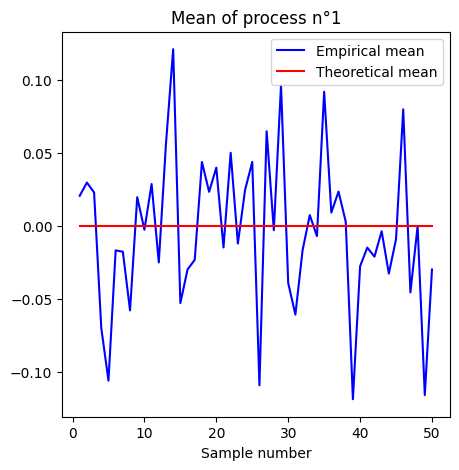

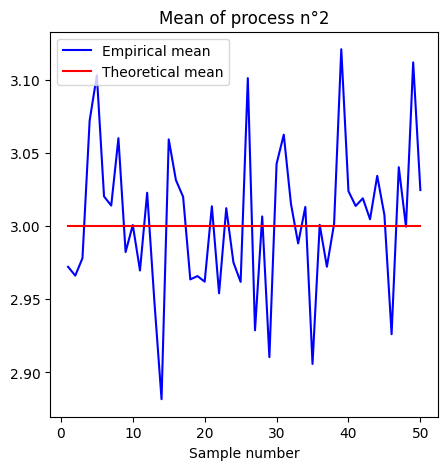

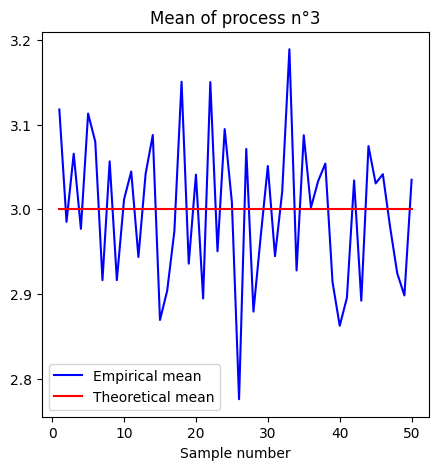

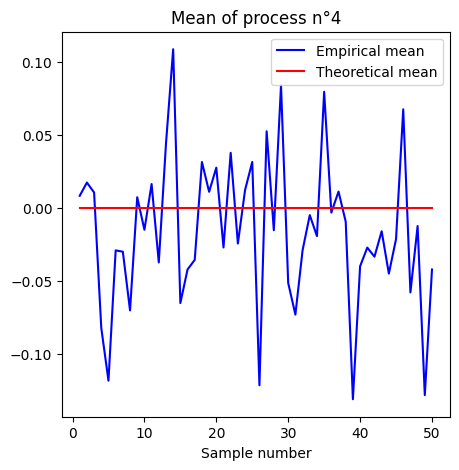

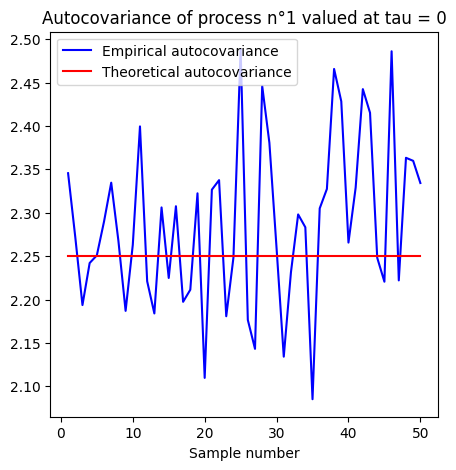

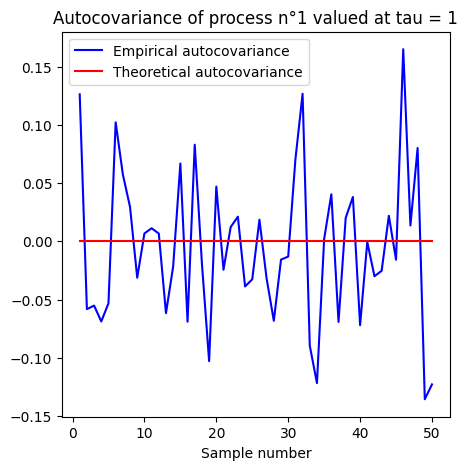

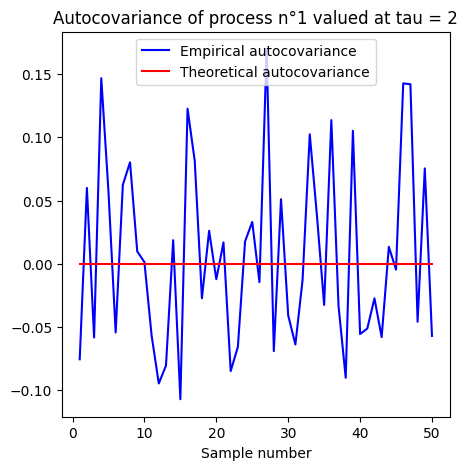

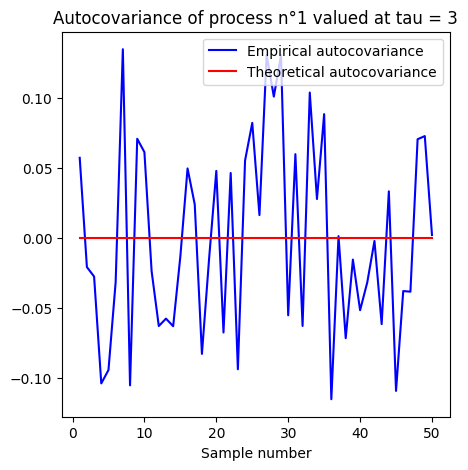

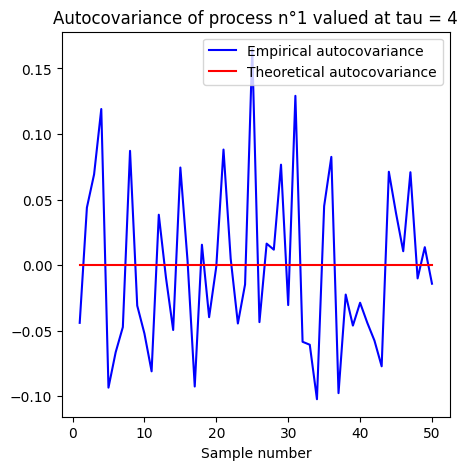

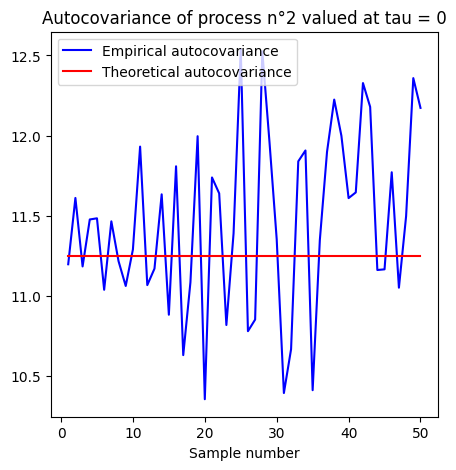

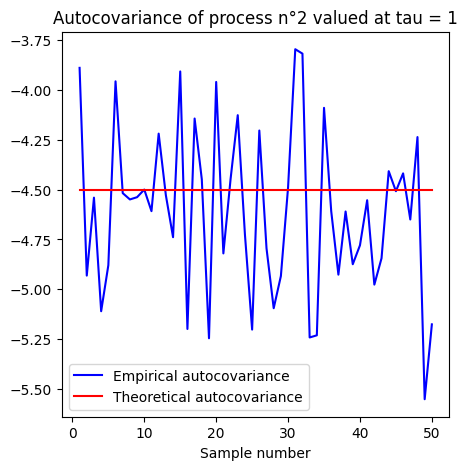

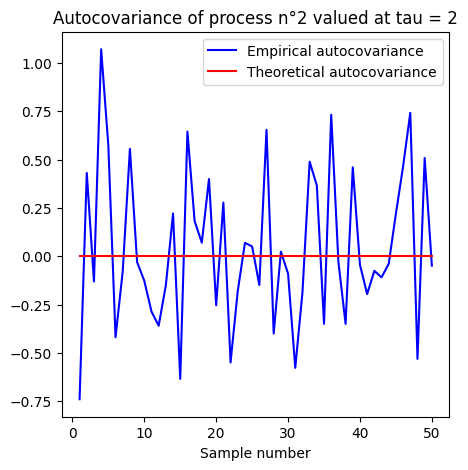

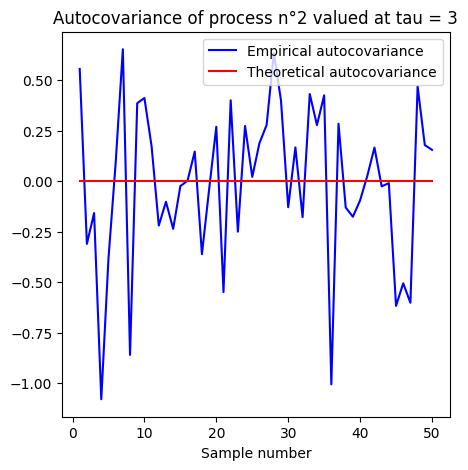

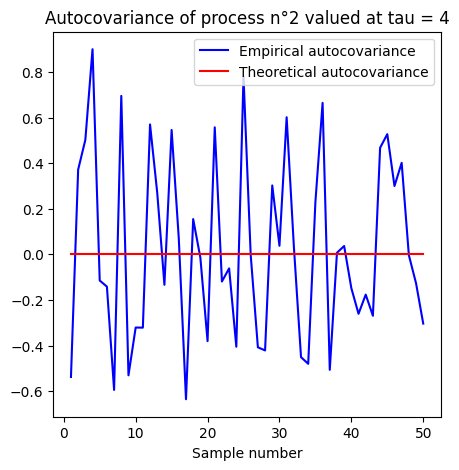

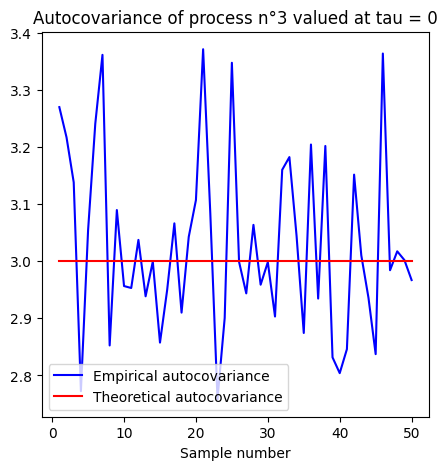

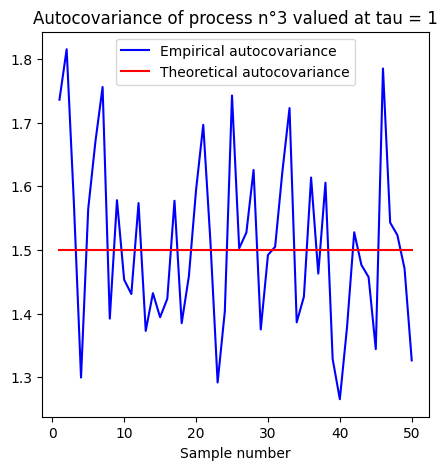

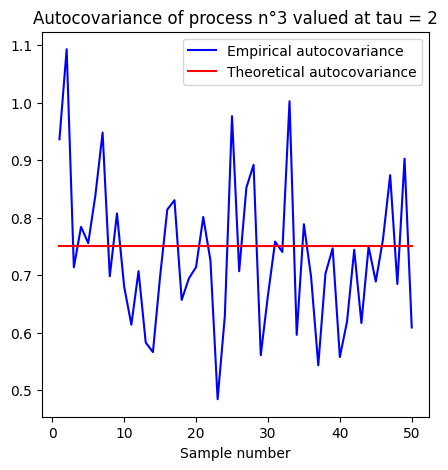

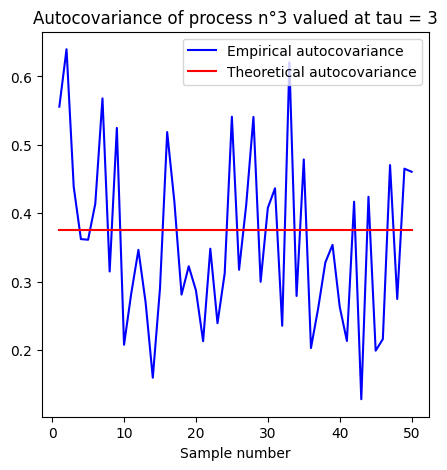

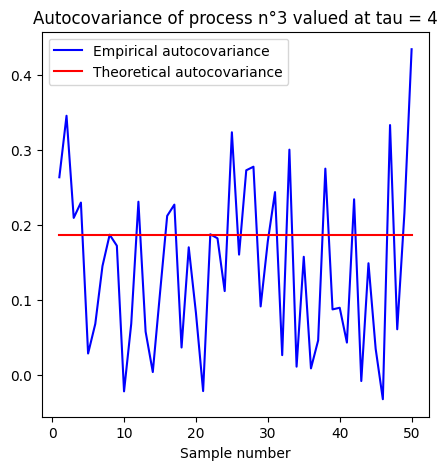

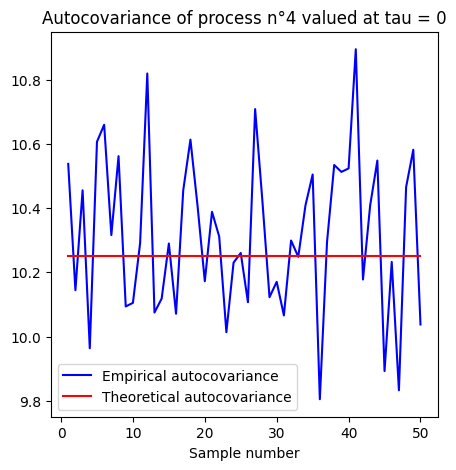

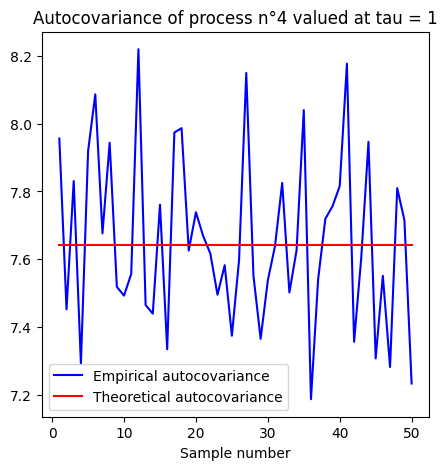

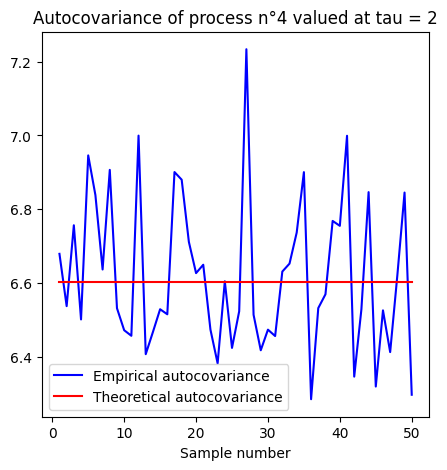

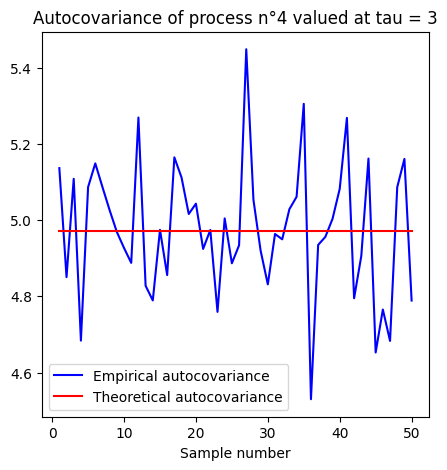

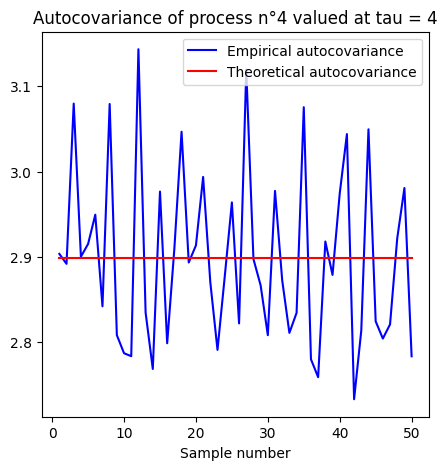

In [12]:
import matplotlib.pyplot as plt

N_samples = 50 # Number of (X1,...,Xn) drawn to compute empirical mean and empirical autocovariance
X1_means = []
X2_means = []
X3_means = []
X4_means = []
X1_autocov = []
X2_autocov = []
X3_autocov = []
X4_autocov = []
for tau in range(5):
        X1_autocov.append([])
        X2_autocov.append([])
        X3_autocov.append([])
        X4_autocov.append([])
for k in range(N_samples):
    X1,X2,X3,X4 = generate_random(n)
    X1_means.append(empirical_mean(X1))
    X2_means.append(empirical_mean(X2))
    X3_means.append(empirical_mean(X3))
    X4_means.append(empirical_mean(X4))
    for tau in range(5):
        X1_autocov[tau].append(empirical_autocovariance(X1,tau))
        X2_autocov[tau].append(empirical_autocovariance(X2,tau))
        X3_autocov[tau].append(empirical_autocovariance(X3,tau))
        X4_autocov[tau].append(empirical_autocovariance(X4,tau))

plt.figure(figsize=(5,5))
plt.plot([i+1 for i in range(N_samples)],X1_means,label='Empirical mean',color='b')
plt.plot([1,N_samples],[0.0,0.0],label='Theoretical mean',color='r')
plt.title('Mean of process n°1')
plt.legend()
plt.xlabel('Sample number')

plt.figure(figsize=(5,5))
plt.plot([i+1 for i in range(N_samples)],X2_means,label='Empirical mean',color='b')
plt.plot([1,N_samples],[a,a],label='Theoretical mean',color='r')
plt.title('Mean of process n°2')
plt.legend()
plt.xlabel('Sample number')

plt.figure(figsize=(5,5))
plt.plot([i+1 for i in range(N_samples)],X3_means,label='Empirical mean',color='b')
plt.plot([1,N_samples],[a,a],label='Theoretical mean',color='r')
plt.title('Mean of process n°3')
plt.legend()
plt.xlabel('Sample number')

plt.figure(figsize=(5,5))
plt.plot([i+1 for i in range(N_samples)],X4_means,label='Empirical mean',color='b')
plt.plot([1,N_samples],[0.0,0.0],label='Theoretical mean',color='r')
plt.title('Mean of process n°4')
plt.legend()
plt.xlabel('Sample number')

for tau in range(5):
    plt.figure(figsize=(5,5))
    plt.plot([i+1 for i in range(N_samples)],X1_autocov[tau],label='Empirical autocovariance',color='b')
    plt.plot([1,N_samples],[theoretical_autocovariance(1,tau),theoretical_autocovariance(1,tau)],label='Theoretical autocovariance',color='r')
    plt.title(f'Autocovariance of process n°1 valued at tau = {tau}')
    plt.xlabel('Sample number')
    plt.legend()

for tau in range(5):
    plt.figure(figsize=(5,5))
    plt.plot([i+1 for i in range(N_samples)],X2_autocov[tau],label='Empirical autocovariance',color='b')
    plt.plot([1,N_samples],[theoretical_autocovariance(2,tau),theoretical_autocovariance(2,tau)],label='Theoretical autocovariance',color='r')
    plt.title(f'Autocovariance of process n°2 valued at tau = {tau}')
    plt.xlabel('Sample number')
    plt.legend()

for tau in range(5):
    plt.figure(figsize=(5,5))
    plt.plot([i+1 for i in range(N_samples)],X3_autocov[tau],label='Empirical autocovariance',color='b')
    plt.plot([1,N_samples],[theoretical_autocovariance(3,tau),theoretical_autocovariance(3,tau)],label='Theoretical autocovariance',color='r')
    plt.title(f'Autocovariance of process n°3 valued at tau = {tau}')
    plt.xlabel('Sample number')
    plt.legend()

for tau in range(5):
    plt.figure(figsize=(5,5))
    plt.plot([i+1 for i in range(N_samples)],X4_autocov[tau],label='Empirical autocovariance',color='b')
    plt.plot([1,N_samples],[theoretical_autocovariance(4,tau),theoretical_autocovariance(4,tau)],label='Theoretical autocovariance',color='r')
    plt.title(f'Autocovariance of process n°4 valued at tau = {tau}')
    plt.xlabel('Sample number')
    plt.legend()

For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - For a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - Compute the boxplot of the MSE for each $T$ and comment.

C:\Users\Arnaud\AppData\Local\Temp\ipykernel_8296\910815749.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


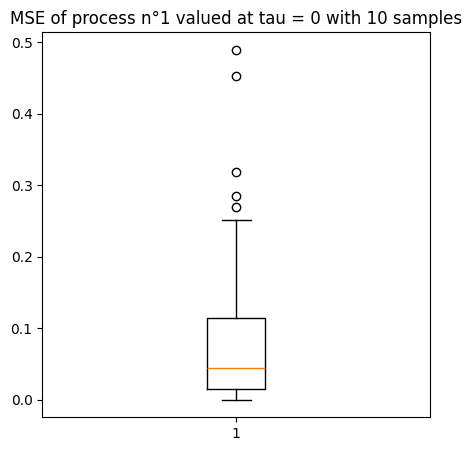

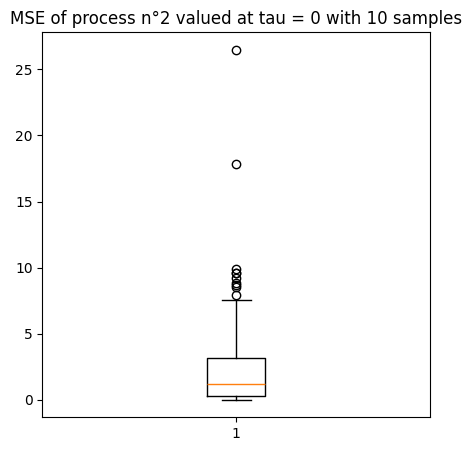

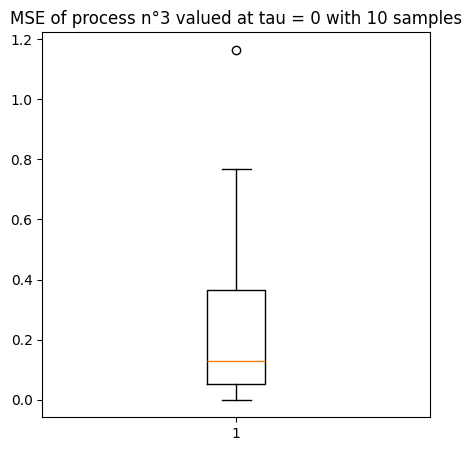

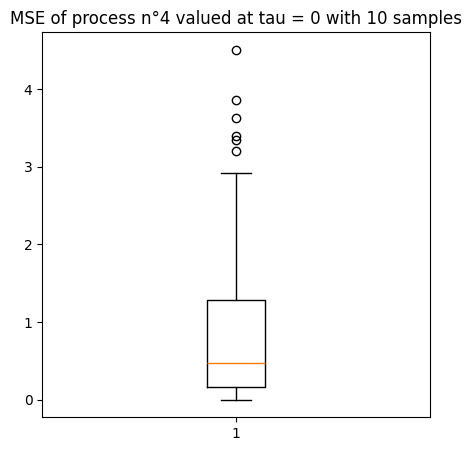

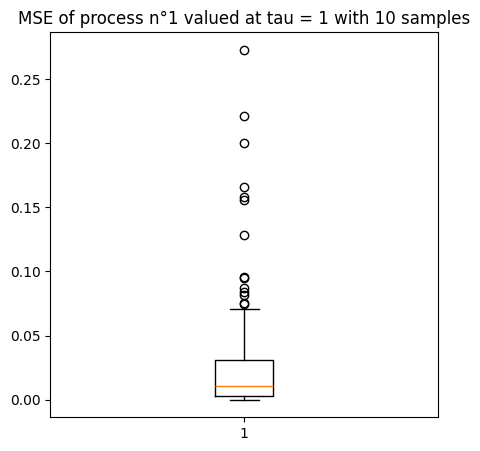

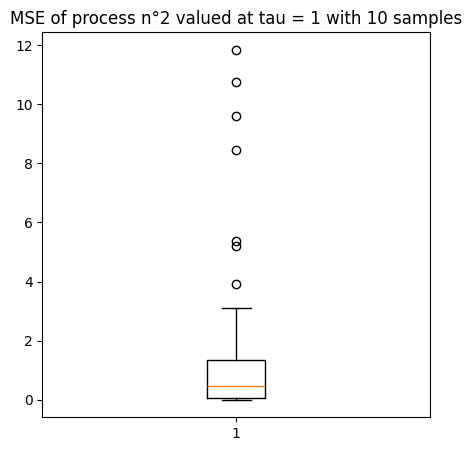

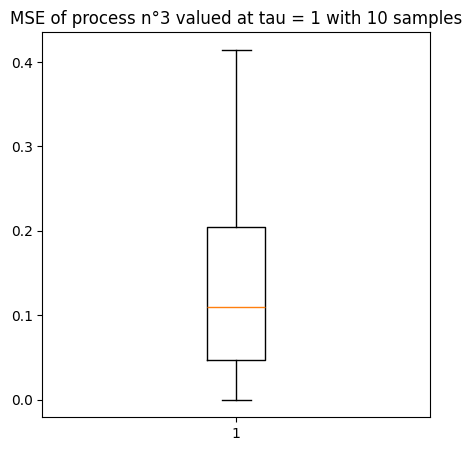

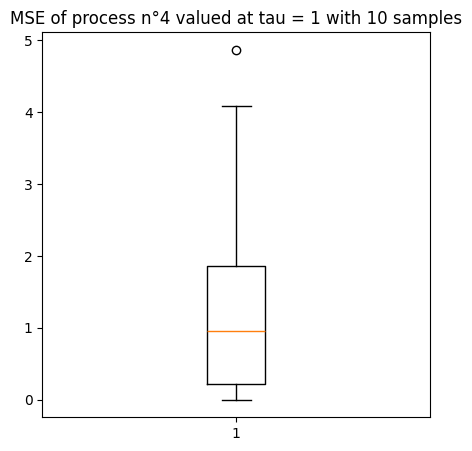

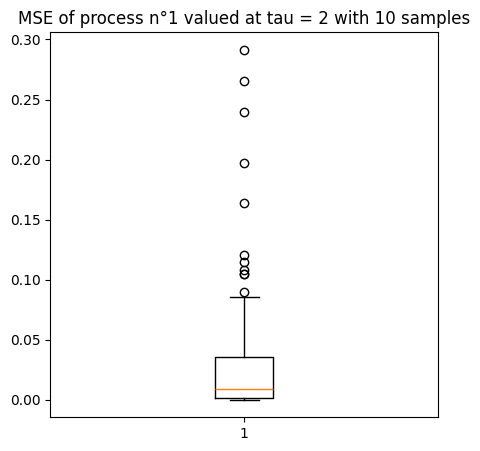

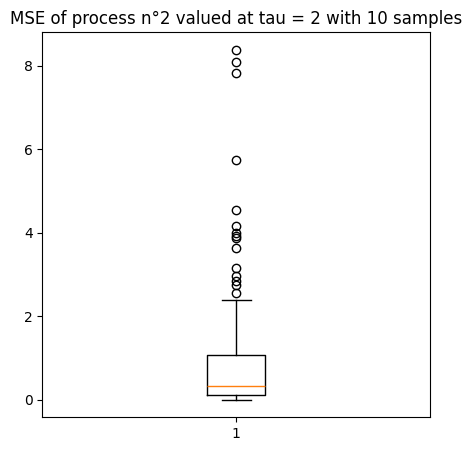

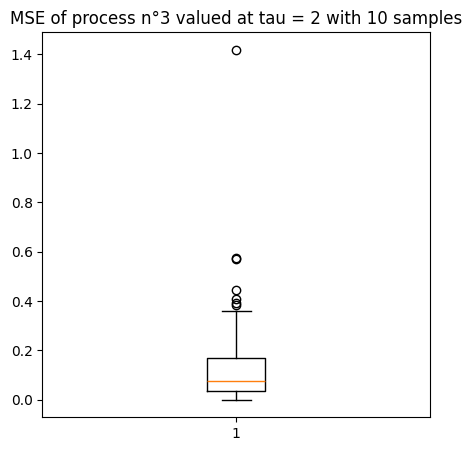

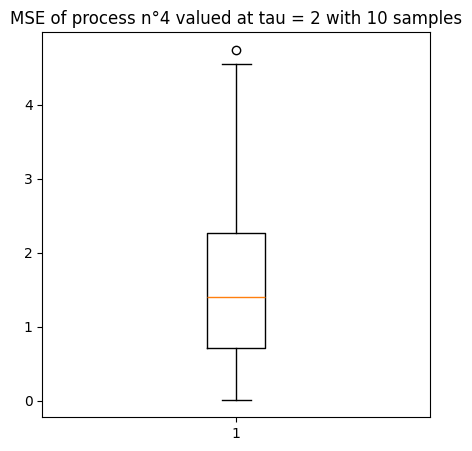

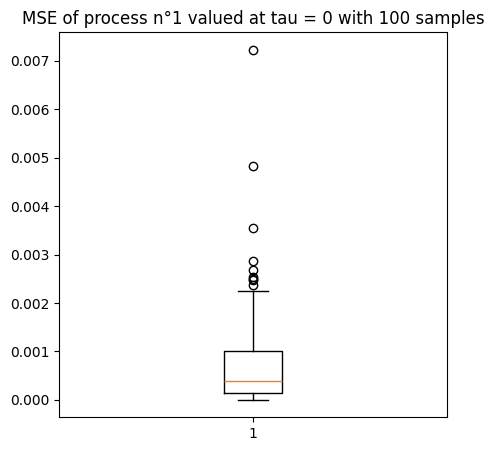

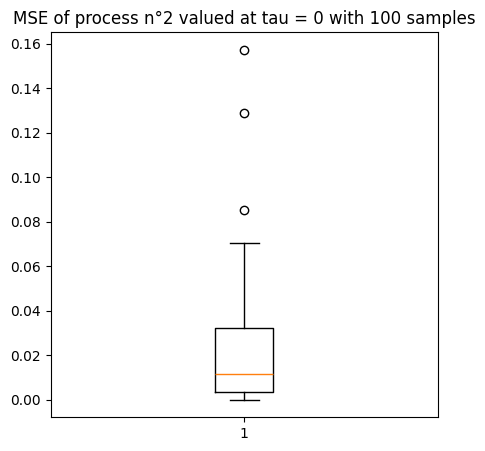

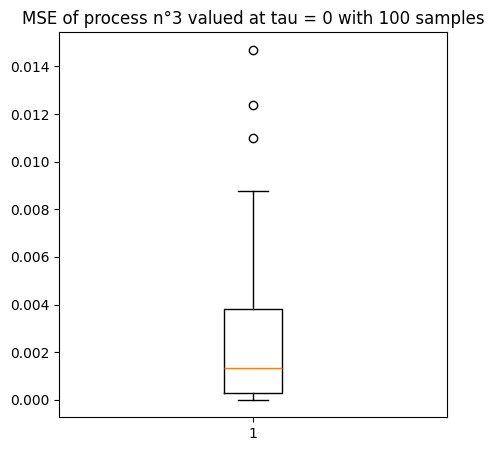

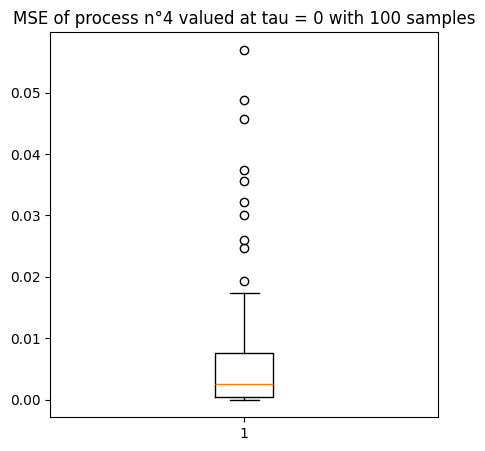

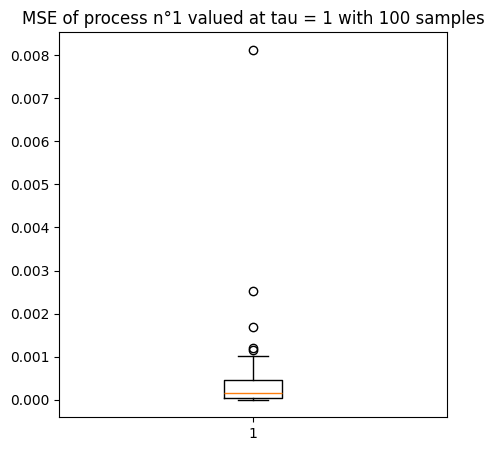

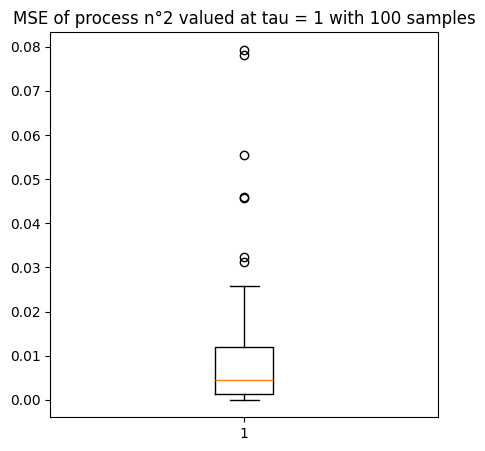

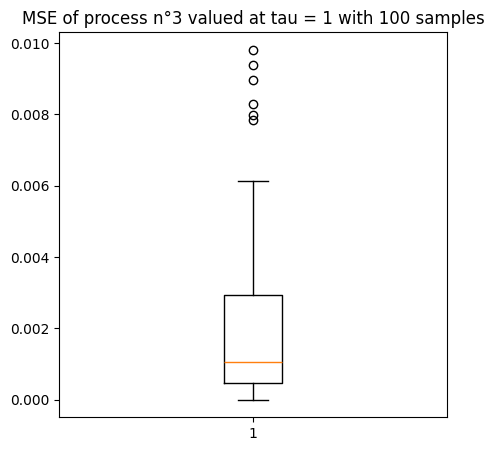

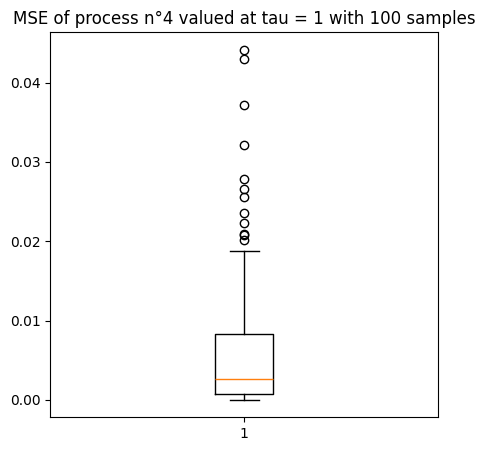

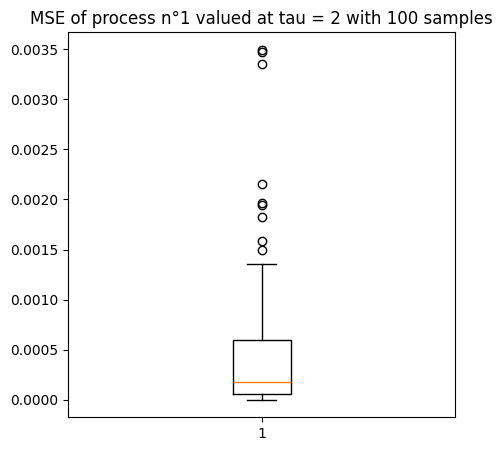

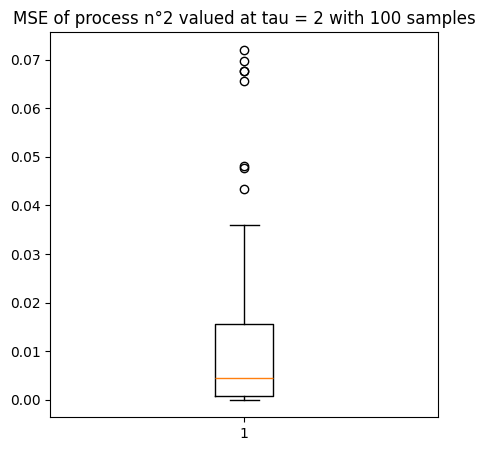

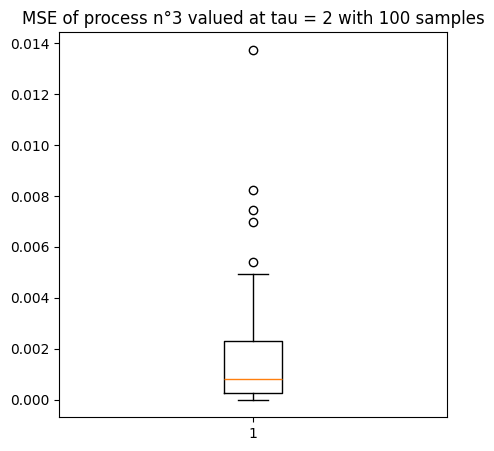

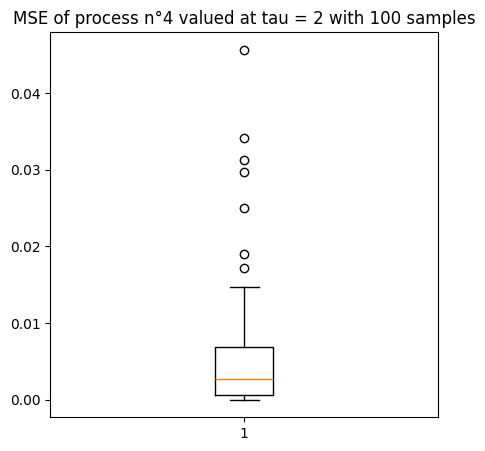

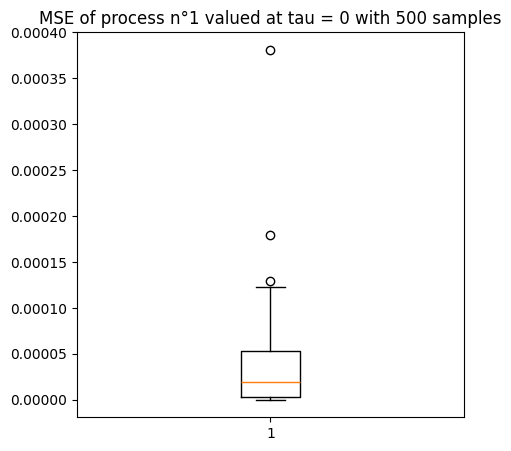

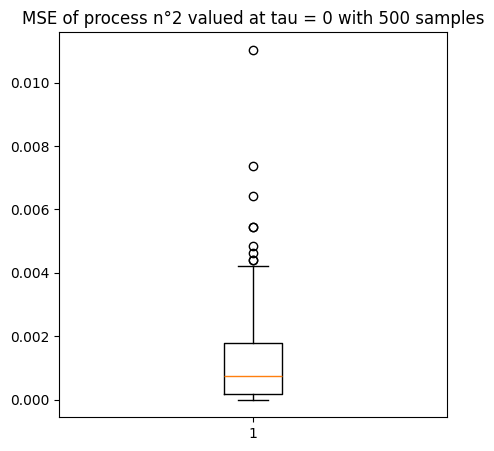

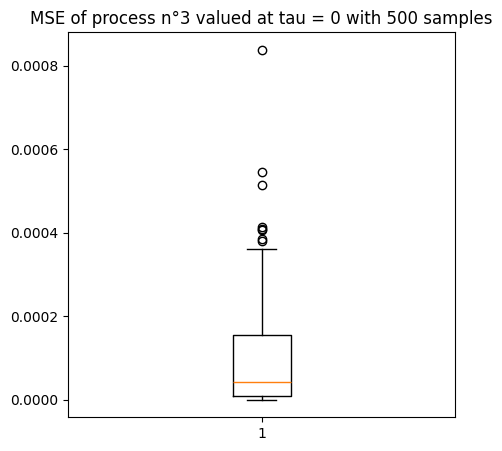

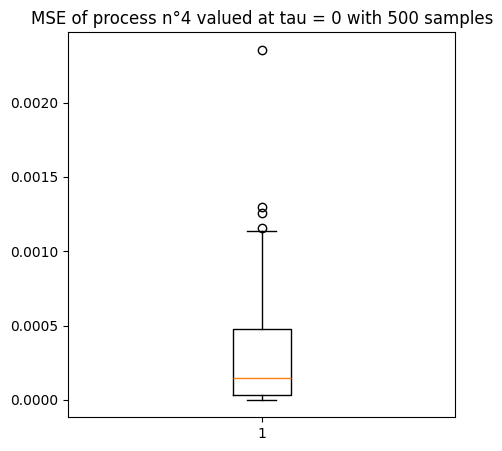

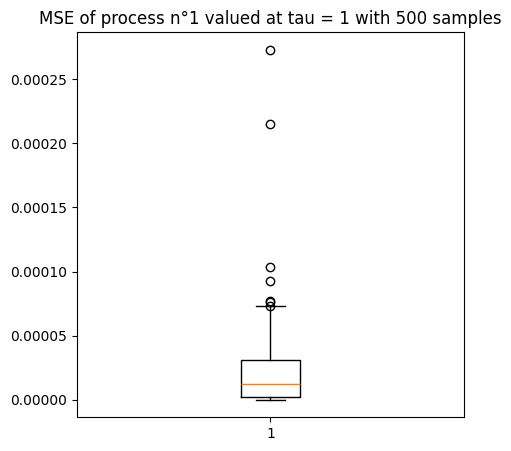

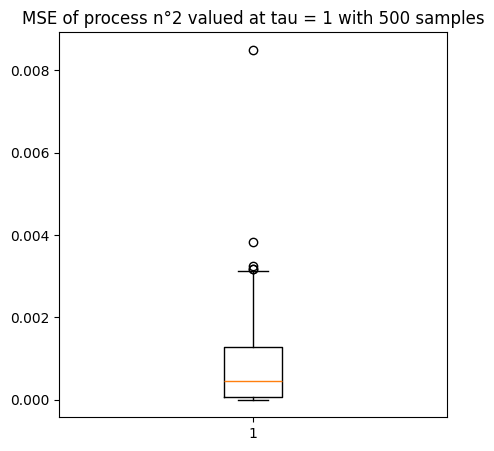

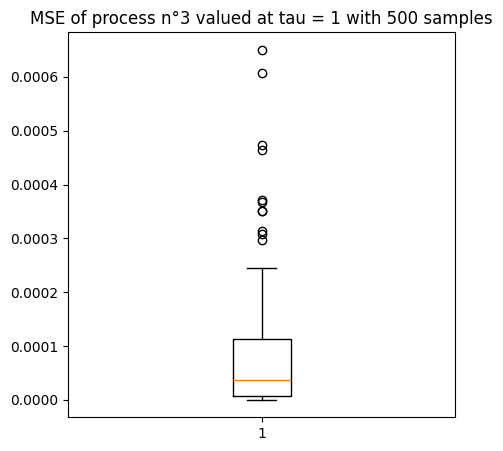

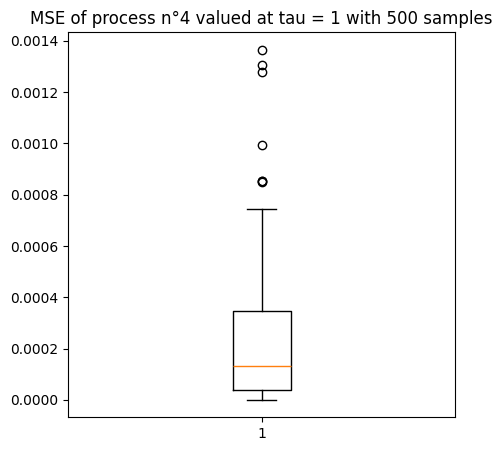

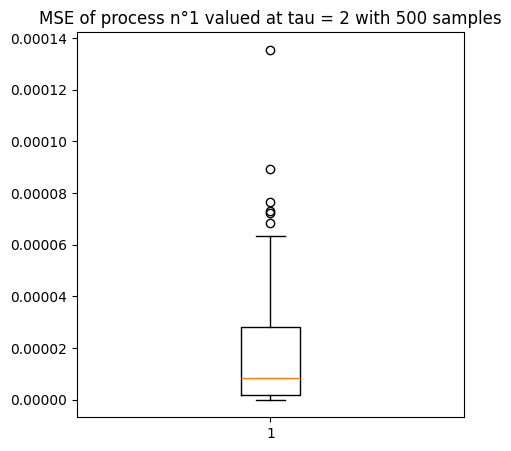

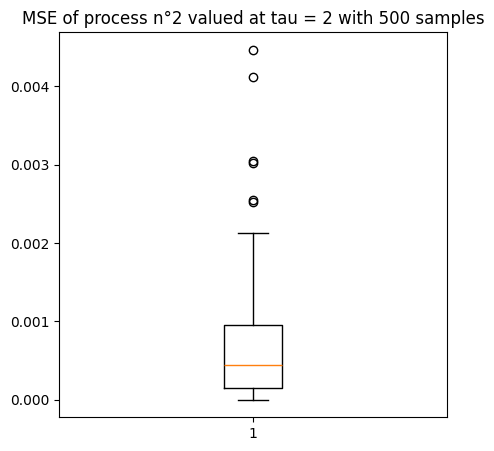

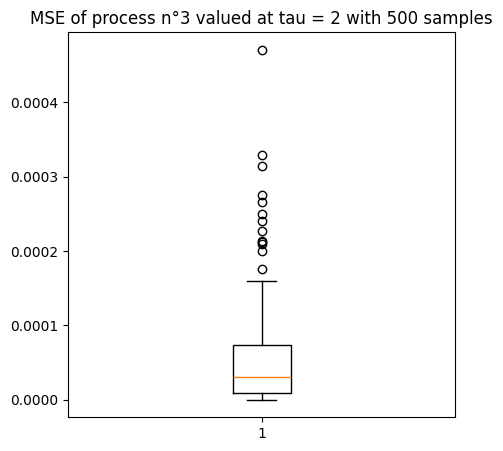

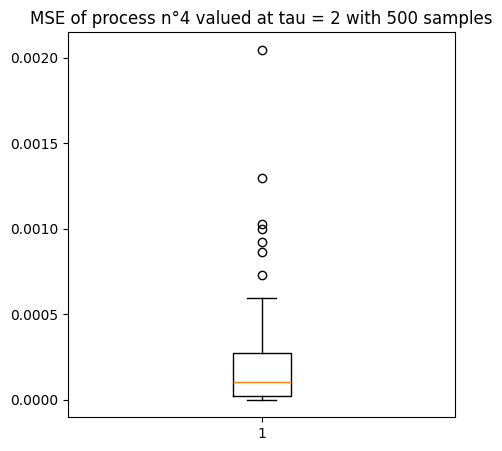

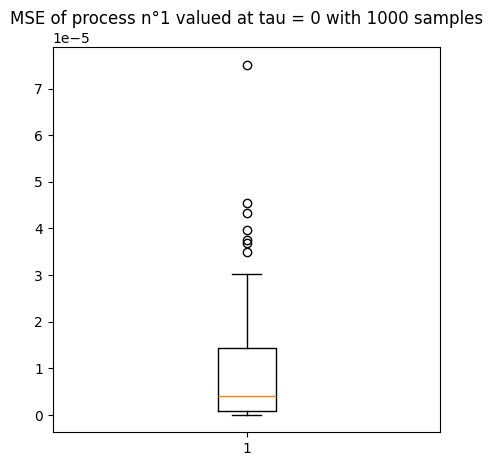

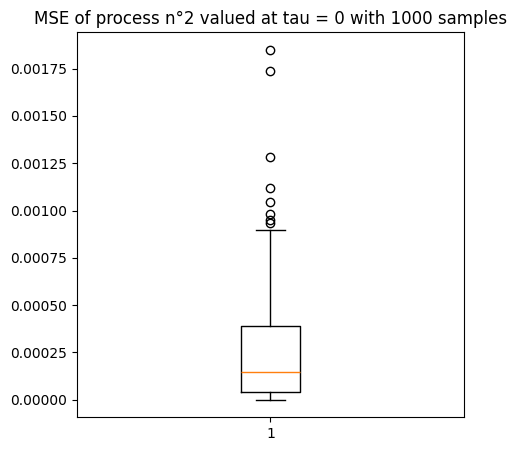

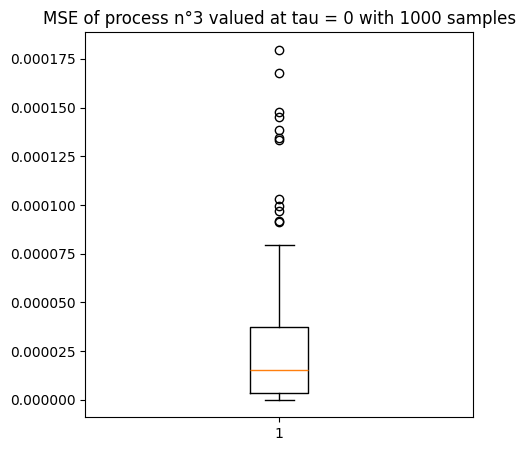

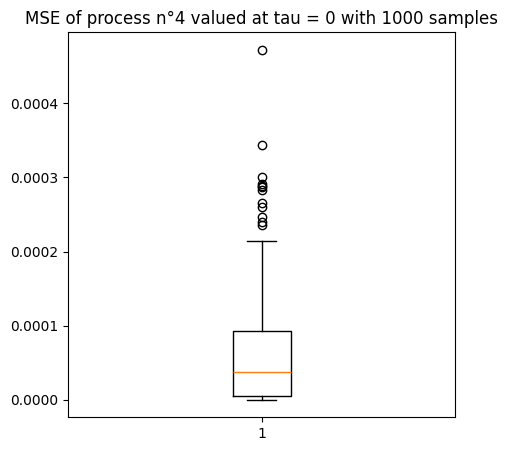

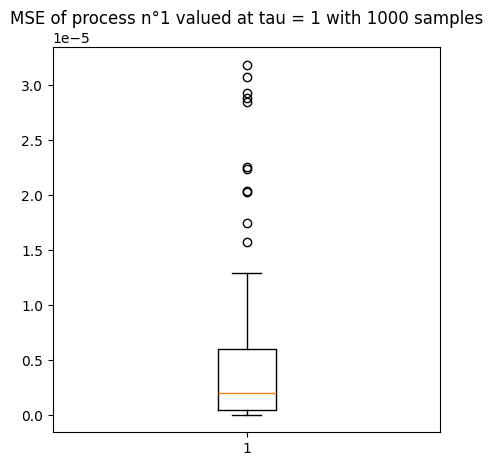

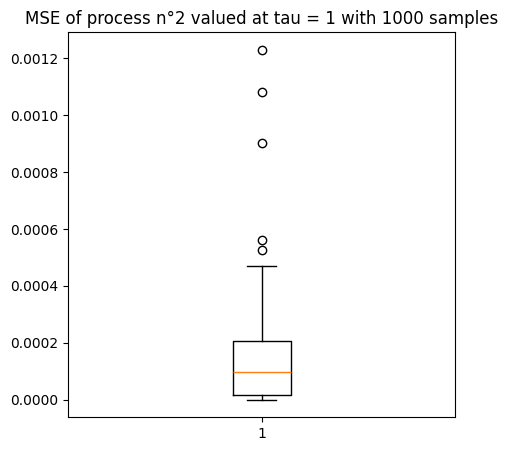

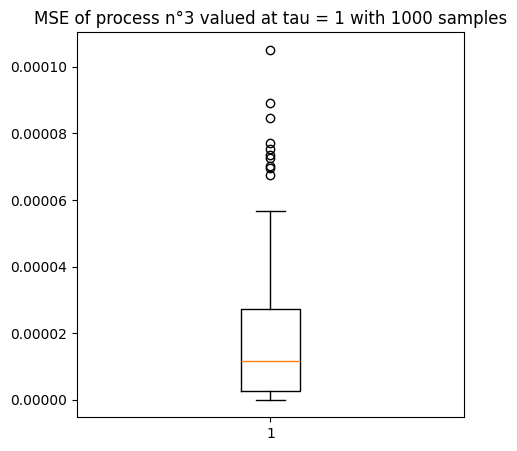

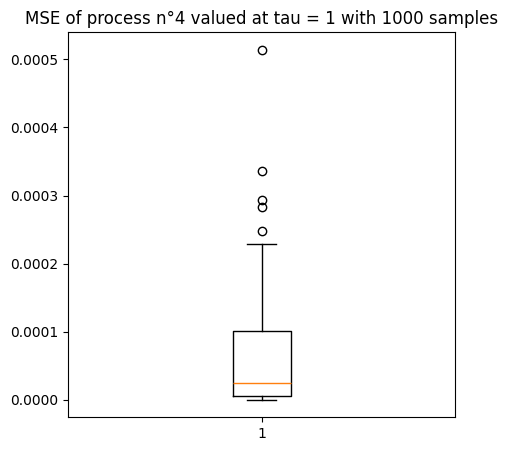

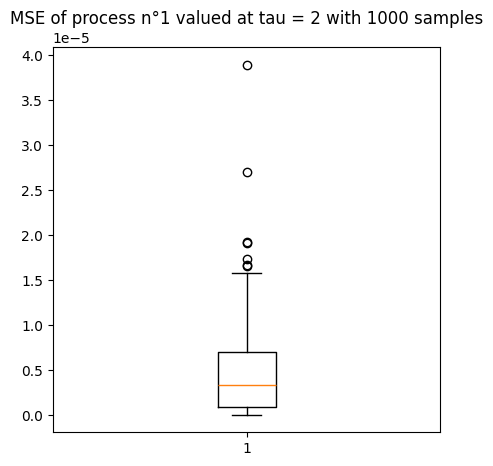

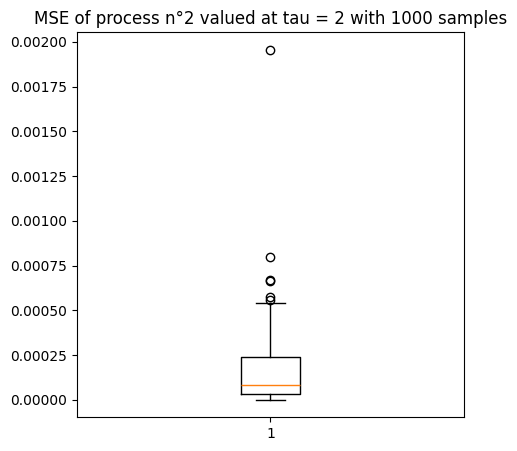

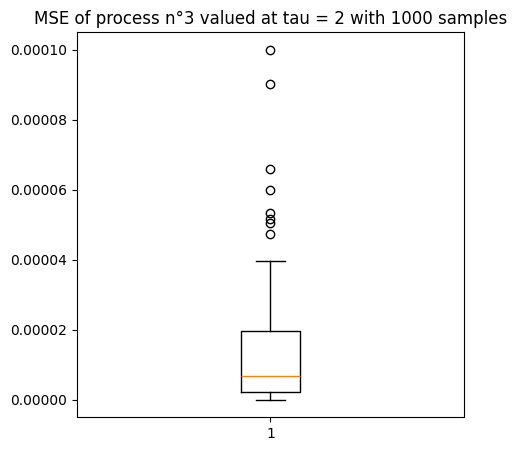

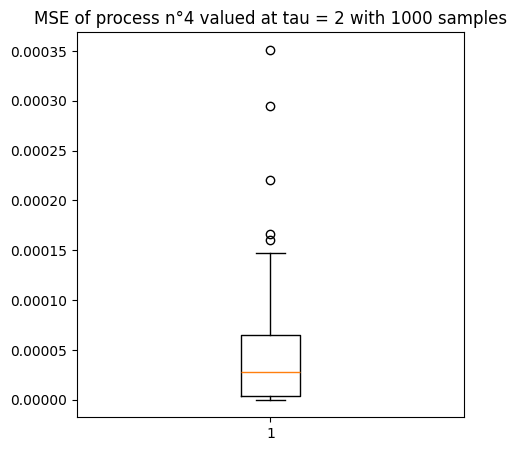

In [14]:
T = [10,100,500,1000]

for t in T:
    MSE_X1 = []
    MSE_X2 = []
    MSE_X3 = []
    MSE_X4 = []
    for tau in range(3):
        MSE_X1.append([])
        MSE_X2.append([])
        MSE_X3.append([])
        MSE_X4.append([])
    for k in range(100):
        X1,X2,X3,X4 = generate_random(t)
        for tau in range(3):
            MSE_X1[tau].append(np.sum((theoretical_autocovariance(1,tau)-empirical_autocovariance(X1,tau))**2)/t)
            MSE_X2[tau].append(np.sum((theoretical_autocovariance(2,tau)-empirical_autocovariance(X2,tau))**2)/t)
            MSE_X3[tau].append(np.sum((theoretical_autocovariance(3,tau)-empirical_autocovariance(X3,tau))**2)/t)
            MSE_X4[tau].append(np.sum((theoretical_autocovariance(4,tau)-empirical_autocovariance(X4,tau))**2)/t)
    for tau in range(3):
        plt.figure(figsize=(5,5))
        plt.boxplot(MSE_X1[tau])
        plt.title(f"MSE of process n°1 valued at tau = {tau} with {t} samples")
        plt.figure(figsize=(5,5))
        plt.boxplot(MSE_X2[tau])
        plt.title(f"MSE of process n°2 valued at tau = {tau} with {t} samples")
        plt.figure(figsize=(5,5))
        plt.boxplot(MSE_X3[tau])
        plt.title(f"MSE of process n°3 valued at tau = {tau} with {t} samples")
        plt.figure(figsize=(5,5))
        plt.boxplot(MSE_X4[tau])
        plt.title(f"MSE of process n°4 valued at tau = {tau} with {t} samples")



We notice that the MSE of each sample gets closer to 0 as the length of each sample T is increasing, meaning we get more accurate valuers of autocovariance for greater number of random variables sampled. 